# Shopify App Store Basic EDA

The dataset includes information about Shopify app store apps (created by developers) and reviews (published by shops).

 - apps.csv28 31 x 12
 - apps_categories.csv 4155 x 2
 - categories.csv 12 x 2
 - key_benefits.csv 7446 x 3
 - reviews.csv 292k x 8

## Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
apps = pd.read_csv('/Users/alex/Documents/shopify-app-store/apps.csv', usecols = ['id', 'title', 'tagline', 'developer', 'rating', 'reviews_count', 'pricing_hint'])

In [3]:
apps.head()

,id,title,tagline,developer,rating,reviews_count,pricing_hint
0,1,Hit Counter,Boost sales using social proof with a simple h...,POWr.io,4.4,39,NaN
1,2,Categories Uncomplicated,"Categories for Shopify, done the right way",Lightenna Ltd,5.0,34,10-day free trial
2,3,Ads by Varinode,Free Ad exchange to help you acquire high qual...,"Varinode, Inc.",4.9,3336,NaN
3,4,All in One Metafields,Create And Handle Everything Related To Custom...,Identix Web,4.9,11,7-day free trial
4,5,Product Options and Customizer,Create extra and unlimited product options (pr...,SolverCircle,4.3,70,10-day free trial


In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 7 columns):
id               2831 non-null int64
title            2831 non-null object
tagline          2831 non-null object
developer        2831 non-null object
rating           2831 non-null float64
reviews_count    2831 non-null int64
pricing_hint     1768 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 154.9+ KB


## EDA

### Total number of apps

In [5]:
print('Total number of apps: ', apps.id.nunique())

Total number of apps:  2831


### Most Popular Apps (by reviews count)

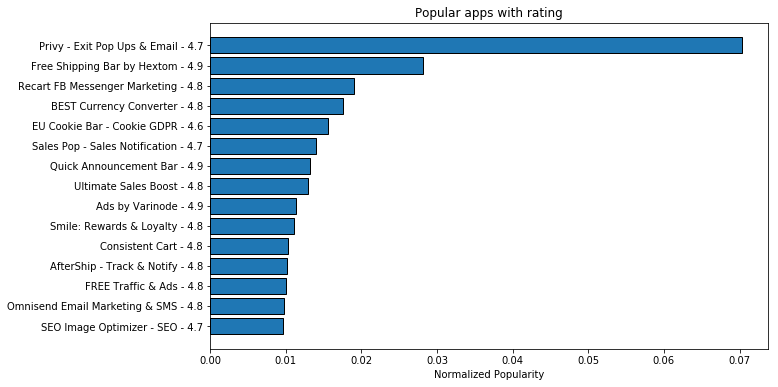

In [6]:
df = apps.sort_values('reviews_count', ascending = False).reset_index()
    
df['importance_normalized'] = df['reviews_count'] / df['reviews_count'].sum()

plt.figure(figsize = (10, 6))
ax = plt.subplot()
    
ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
ax.set_yticks(list(reversed(list(df.index[:15]))))
ax.set_yticklabels(df['title'].head(15) + ' - ' + df['rating'].head(15).map(str))
    
plt.xlabel('Normalized Popularity'); plt.title('Popular apps with rating')
plt.show()

#### Unique developers

In [7]:
print('Unique developers number: ', apps.developer.nunique())

Unique developers number:  1552


#### Number of apps per developer

In [8]:
apps_developers = pd.DataFrame(apps.groupby('developer').id.count().sort_values(ascending=False).reset_index())

average_rating = pd.DataFrame(apps.groupby(['developer']).rating.mean()).reset_index()

average_rating = pd.merge(apps_developers, average_rating, on='developer')

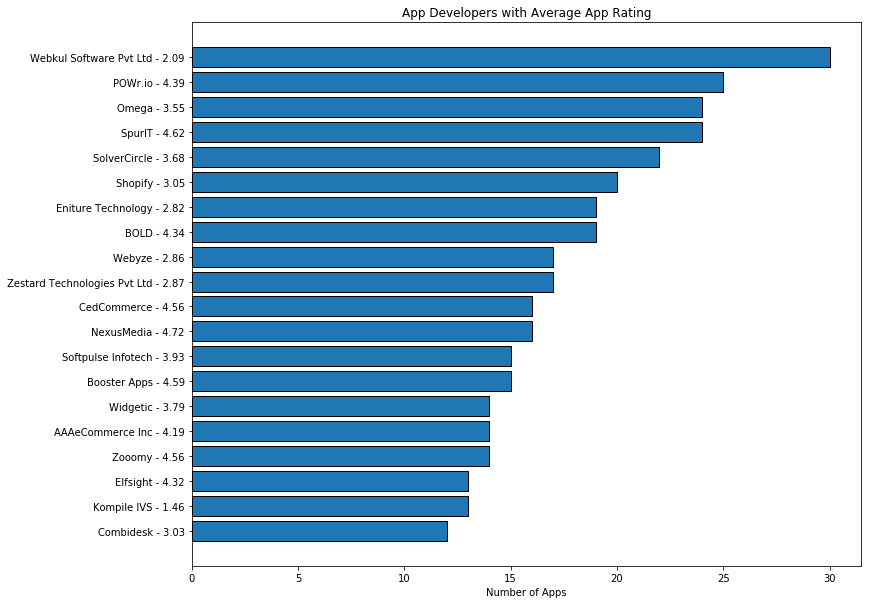

In [9]:
plt.figure(figsize = (12, 10))
ax = plt.subplot()
    
ax.barh(list(reversed(list(average_rating.index[:20]))), 
            average_rating.id.head(20), 
            align = 'center', edgecolor = 'k')
    
ax.set_yticks(list(reversed(list(average_rating.index[:20]))))
ax.set_yticklabels(average_rating.developer.head(20) + ' - ' + (average_rating.rating.head(20)).round(2).map(str))
    
plt.xlabel('Number of Apps'); plt.title('App Developers with Average App Rating')
plt.show()

### Apps with High Demand and Low Rating

The worst apps were made by Shopify!!!

In [10]:
apps[(apps.reviews_count>40) & (apps.rating<=3)][['title', 'tagline', 'developer', 'rating', 'reviews_count']].sort_values(by='rating')

,title,tagline,developer,rating,reviews_count
760,Instagram channel,Sell on Instagram by tagging products in your ...,Shopify,1.7,379
765,Amazon channel,Sell on Amazon by listing your products and ma...,Shopify,1.8,123
1387,Google Shopping,Show products to interested customers across G...,Shopify,1.8,440
2272,Retail Barcode Labels,Create and print barcode labels for your products,Shopify,1.8,191
1105,BuzzFeed,Leverage BuzzFeed’s engaged audience to sell more,Buzzfeed Product Labs,2.3,41
2041,Facebook Marketing,Promote products to the right audience on Face...,Shopify,2.4,48
1720,Shipwire Order Management,The worlds most powerful cloud fulfillment pla...,Shipwire,2.5,50
1535,Xero® Integration by Bold,Export orders from Shopify into your Xero acco...,BOLD,2.6,140
807,Facebook channel,Sell on Facebook from the Shop section of your...,Shopify,2.8,429
1284,Wanelo,List and sell your products to millions of act...,Wanelo,2.9,183


## Apps Categories

In [11]:
apps_cats_id = pd.read_csv('/Users/alex/Documents/shopify-app-store/apps_categories.csv')
apps_cats = pd.read_csv('/Users/alex/Documents/shopify-app-store/categories.csv')

apps_cats.columns = ['category_id', 'category']

apps_cats_id = pd.merge(apps_cats_id, apps_cats, on='category_id').sort_values(by='app_id').reset_index().drop('index', axis=1)

cat_distribution = pd.DataFrame(apps_cats_id.category.value_counts()).reset_index()

cat_distribution.columns = ['category', 'category_count']

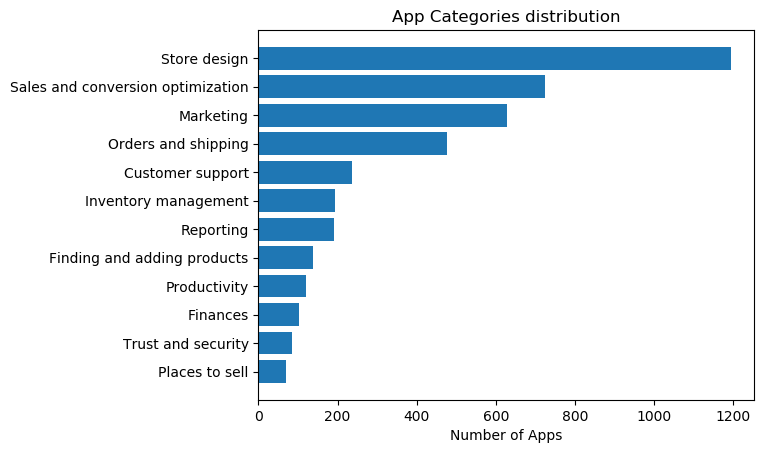

In [12]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
#people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(cat_distribution))
performance = cat_distribution.category_count


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(cat_distribution.category)
ax.invert_yaxis()  
ax.set_xlabel('Number of Apps')
ax.set_title('App Categories distribution')

plt.show()

### Reviews

In [13]:
reviews = pd.read_csv('/Users/alex/Documents/shopify-app-store/reviews.csv')
reviews.shape

(292029, 8)

#### Bad Reviews

In [14]:
print('Number of apps with bad reviews: ', reviews[reviews.rating<=3].app_id.nunique())
print('Number of apps with good reviews ', reviews[reviews.rating>3].app_id.nunique())

Number of apps with bad reviews:  1547
Number of apps with good reviews  2292


In [15]:
good_reviews = pd.DataFrame(reviews[reviews.rating>3].groupby('app_id').size()).reset_index()#.value_counts(ascending=False)
good_reviews.columns = ['id', 'good_review']

bad_reviews = pd.DataFrame(reviews[reviews.rating<=3].groupby('app_id').size()).reset_index()#.value_counts(ascending=False)
bad_reviews.columns = ['id', 'bad_review']

In [16]:
print('Reviews with rating more than 3: ', good_reviews.good_review.sum())
print('Reviews with rating 3 and less: ', bad_reviews.bad_review.sum())

Reviews with rating more than 3:  272271
Reviews with rating 3 and less:  19758


#### Share of Bad Reviews

In [17]:
apps = pd.merge(apps, good_reviews, on='id', how='left')
apps = pd.merge(apps, bad_reviews, on='id', how='left')

apps.bad_review.fillna(0, inplace=True)

apps['share_of_badreviews'] = ((apps.bad_review/apps.reviews_count)*100).round(0)

In [18]:
# apps with share of bad reviews more than 50% and review count more than 100
apps[(apps['share_of_badreviews']>=50) & (apps['reviews_count']>=100)]

,id,title,tagline,developer,rating,reviews_count,pricing_hint,good_review,bad_review,share_of_badreviews
760,761,Instagram channel,Sell on Instagram by tagging products in your ...,Shopify,1.7,379,NaN,58.0,321.0,85.0
765,766,Amazon channel,Sell on Amazon by listing your products and ma...,Shopify,1.8,123,NaN,20.0,103.0,84.0
807,808,Facebook channel,Sell on Facebook from the Shop section of your...,Shopify,2.8,429,NaN,188.0,241.0,56.0
1166,1167,Quickbooks® Sync by Bold,Automatically sync your orders with Quickbooks...,BOLD,3.0,153,NaN,76.0,77.0,50.0
1284,1285,Wanelo,List and sell your products to millions of act...,Wanelo,2.9,183,NaN,87.0,96.0,52.0
1387,1388,Google Shopping,Show products to interested customers across G...,Shopify,1.8,440,NaN,79.0,361.0,82.0
1535,1536,Xero® Integration by Bold,Export orders from Shopify into your Xero acco...,BOLD,2.6,140,NaN,54.0,86.0,61.0
2272,2273,Retail Barcode Labels,Create and print barcode labels for your products,Shopify,1.8,191,NaN,33.0,158.0,83.0


#### Unsatisfied reveiws authors

In [19]:
print('Unique unsatisfied review authors: ', reviews[reviews.rating <=3].author.nunique())

Unique unsatisfied review authors:  16968
